In [1]:
# Load libraries
import time
import os,sys
import math
import numpy as np
import matplotlib.pyplot as plt
import mce_data as mce
from scipy import signal
import pylab as pl
sys.path.insert(0, '/home/cheng/analysis/timestream')
from timestream_powerspec import get_raw_timestream as get_fb

#%matplotlib inline

date = "20210507"
inpath = "/home/data/cryo/%s/"%(date)
#filename = "20210511_fts_N7N6bias1_A_ypos_0_xpos_-45000_real"#1
#filename = "20210511_fts_N7N6bias1_A_ypos_0_xpos_-47000_real"#2
#filename = "20210511_fts_N7N6bias1_A_ypos_-14000_xpos_-45000_real"#3
#filename = "20210511_fts_N7N6bias1_A_ypos_-14000_xpos_-49000_real"#4
#filename = "20210511_fts_N7N6bias1_A_ypos_-18000_xpos_-39000_real"#5
#filename = "20210511_fts_N7N6bias1_A_ypos_-2000_xpos_-45000_real"#6
#filename = "20210511_fts_N7N6bias1_A_ypos_-6000_xpos_-39000_real"#7
#filename = "20210505_fts_N7N6_B_ypos_-11000_xpos_-50000_real"#8
#filename = "20210505_fts_N7N6_B_ypos_-12000_xpos_-28000_real"#9
#filename = "20210505_fts_N7N6_B_ypos_-15000_xpos_-40000_real"#10
#filename = "20210505_fts_N7N6_B_ypos_-3000_xpos_-31000_real"#11
#filename = "20210505_fts_N7N6_B_ypos_-4000_xpos_-36000_real"#12
#filename = "20210505_fts_N7N6_B_ypos_-5000_xpos_-51000_real"#13
#filename = "20210505_fts_N7N6_B_ypos_-7000_xpos_-54000_real"#14
#filename = "20210507_fts_N7N6bias2_B_ypos_-11000_xpos_-50000_real"#15
#filename = "20210507_fts_N7N6bias2_B_ypos_-12000_xpos_-28000_real"#16
#filename = "20210507_fts_N7N6bias2_B_ypos_-15000_xpos_-40000_real"#17
#filename = "20210507_fts_N7N6bias2_B_ypos_-3000_xpos_-31000_real"#18
#filename = "20210507_fts_N7N6bias2_B_ypos_-4000_xpos_-36000_real"#19
#filename = "20210507_fts_N7N6bias2_B_ypos_-5000_xpos_-51000_real"#20
filename = "20210507_fts_N7N6bias2_B_ypos_-7000_xpos_-54000_real"#21
ims= [0,4] # tile no.s . in SK we only use 0 and 4

datafn = inpath + filename
t0=time.time()
fbs = get_fb(datafn)
print time.time()-t0

freq = fbs.info["freq"]

2.94129896164


In [2]:
period = len(fbs.fbCalib[0,0]) #sec*fsample
outpath = "/home/data/output/%s/ftsscan/%s/"%(date,filename)
if not os.path.isdir(outpath):
    os.makedirs(outpath)

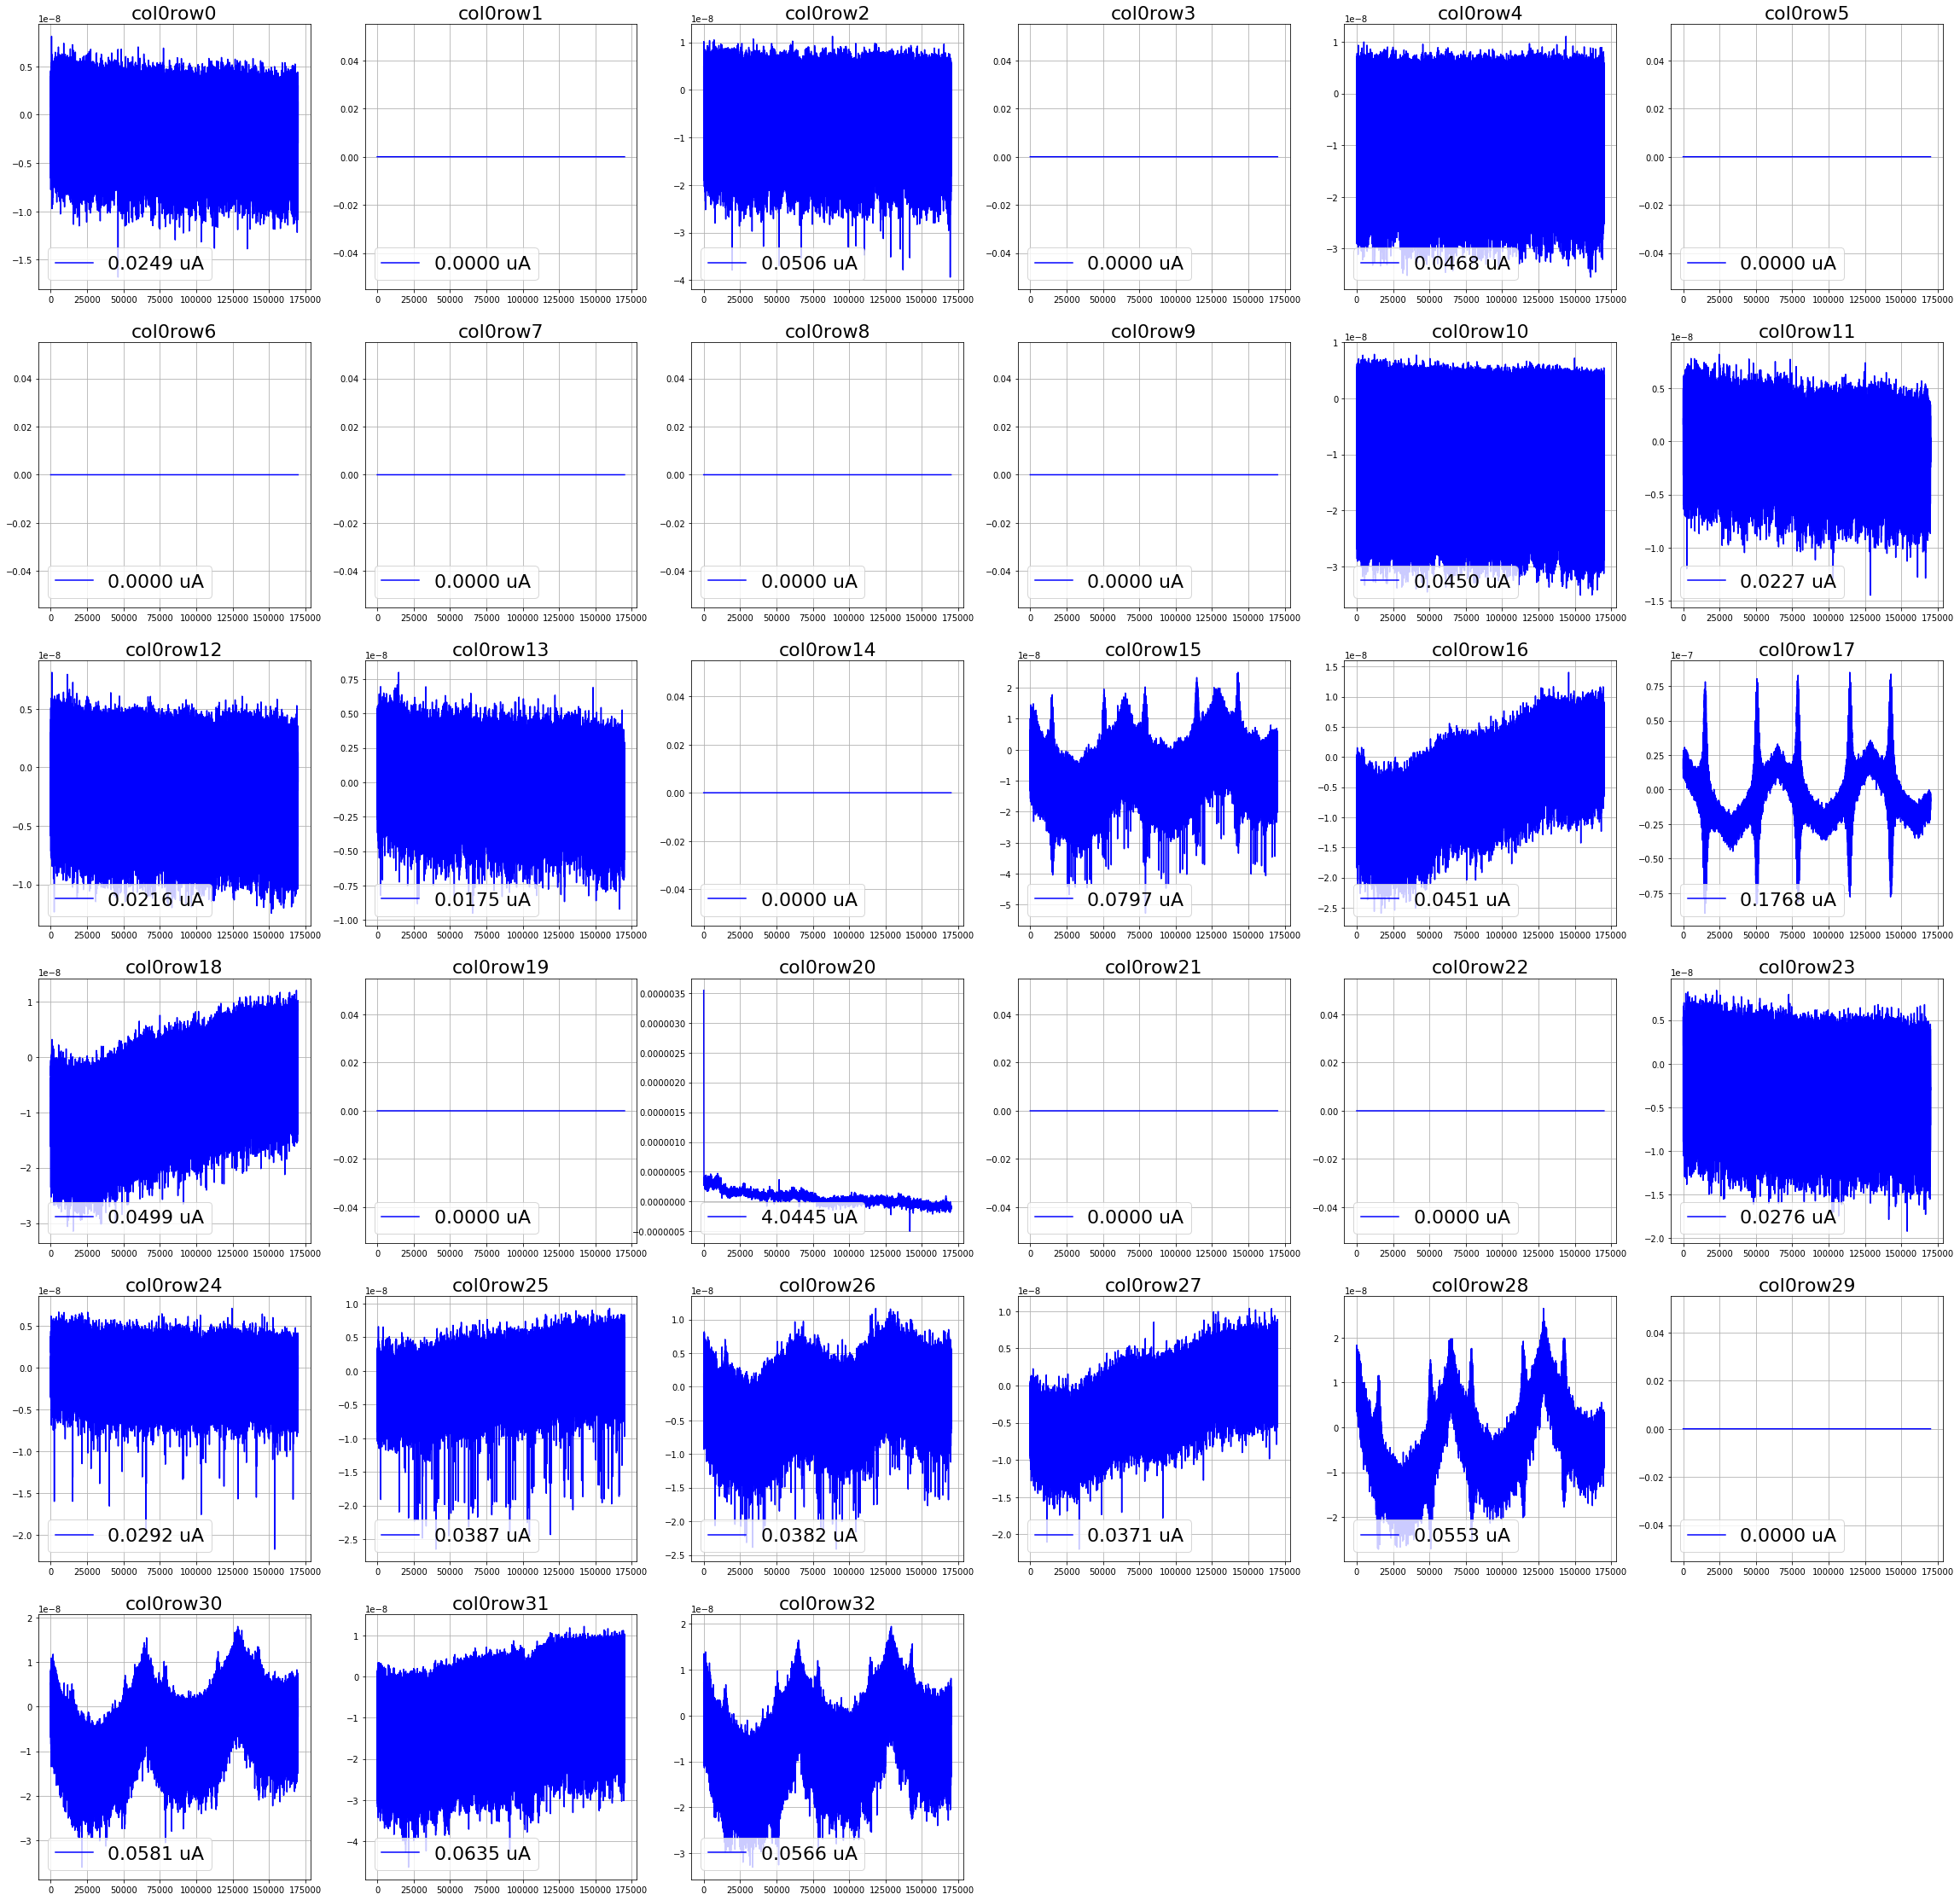

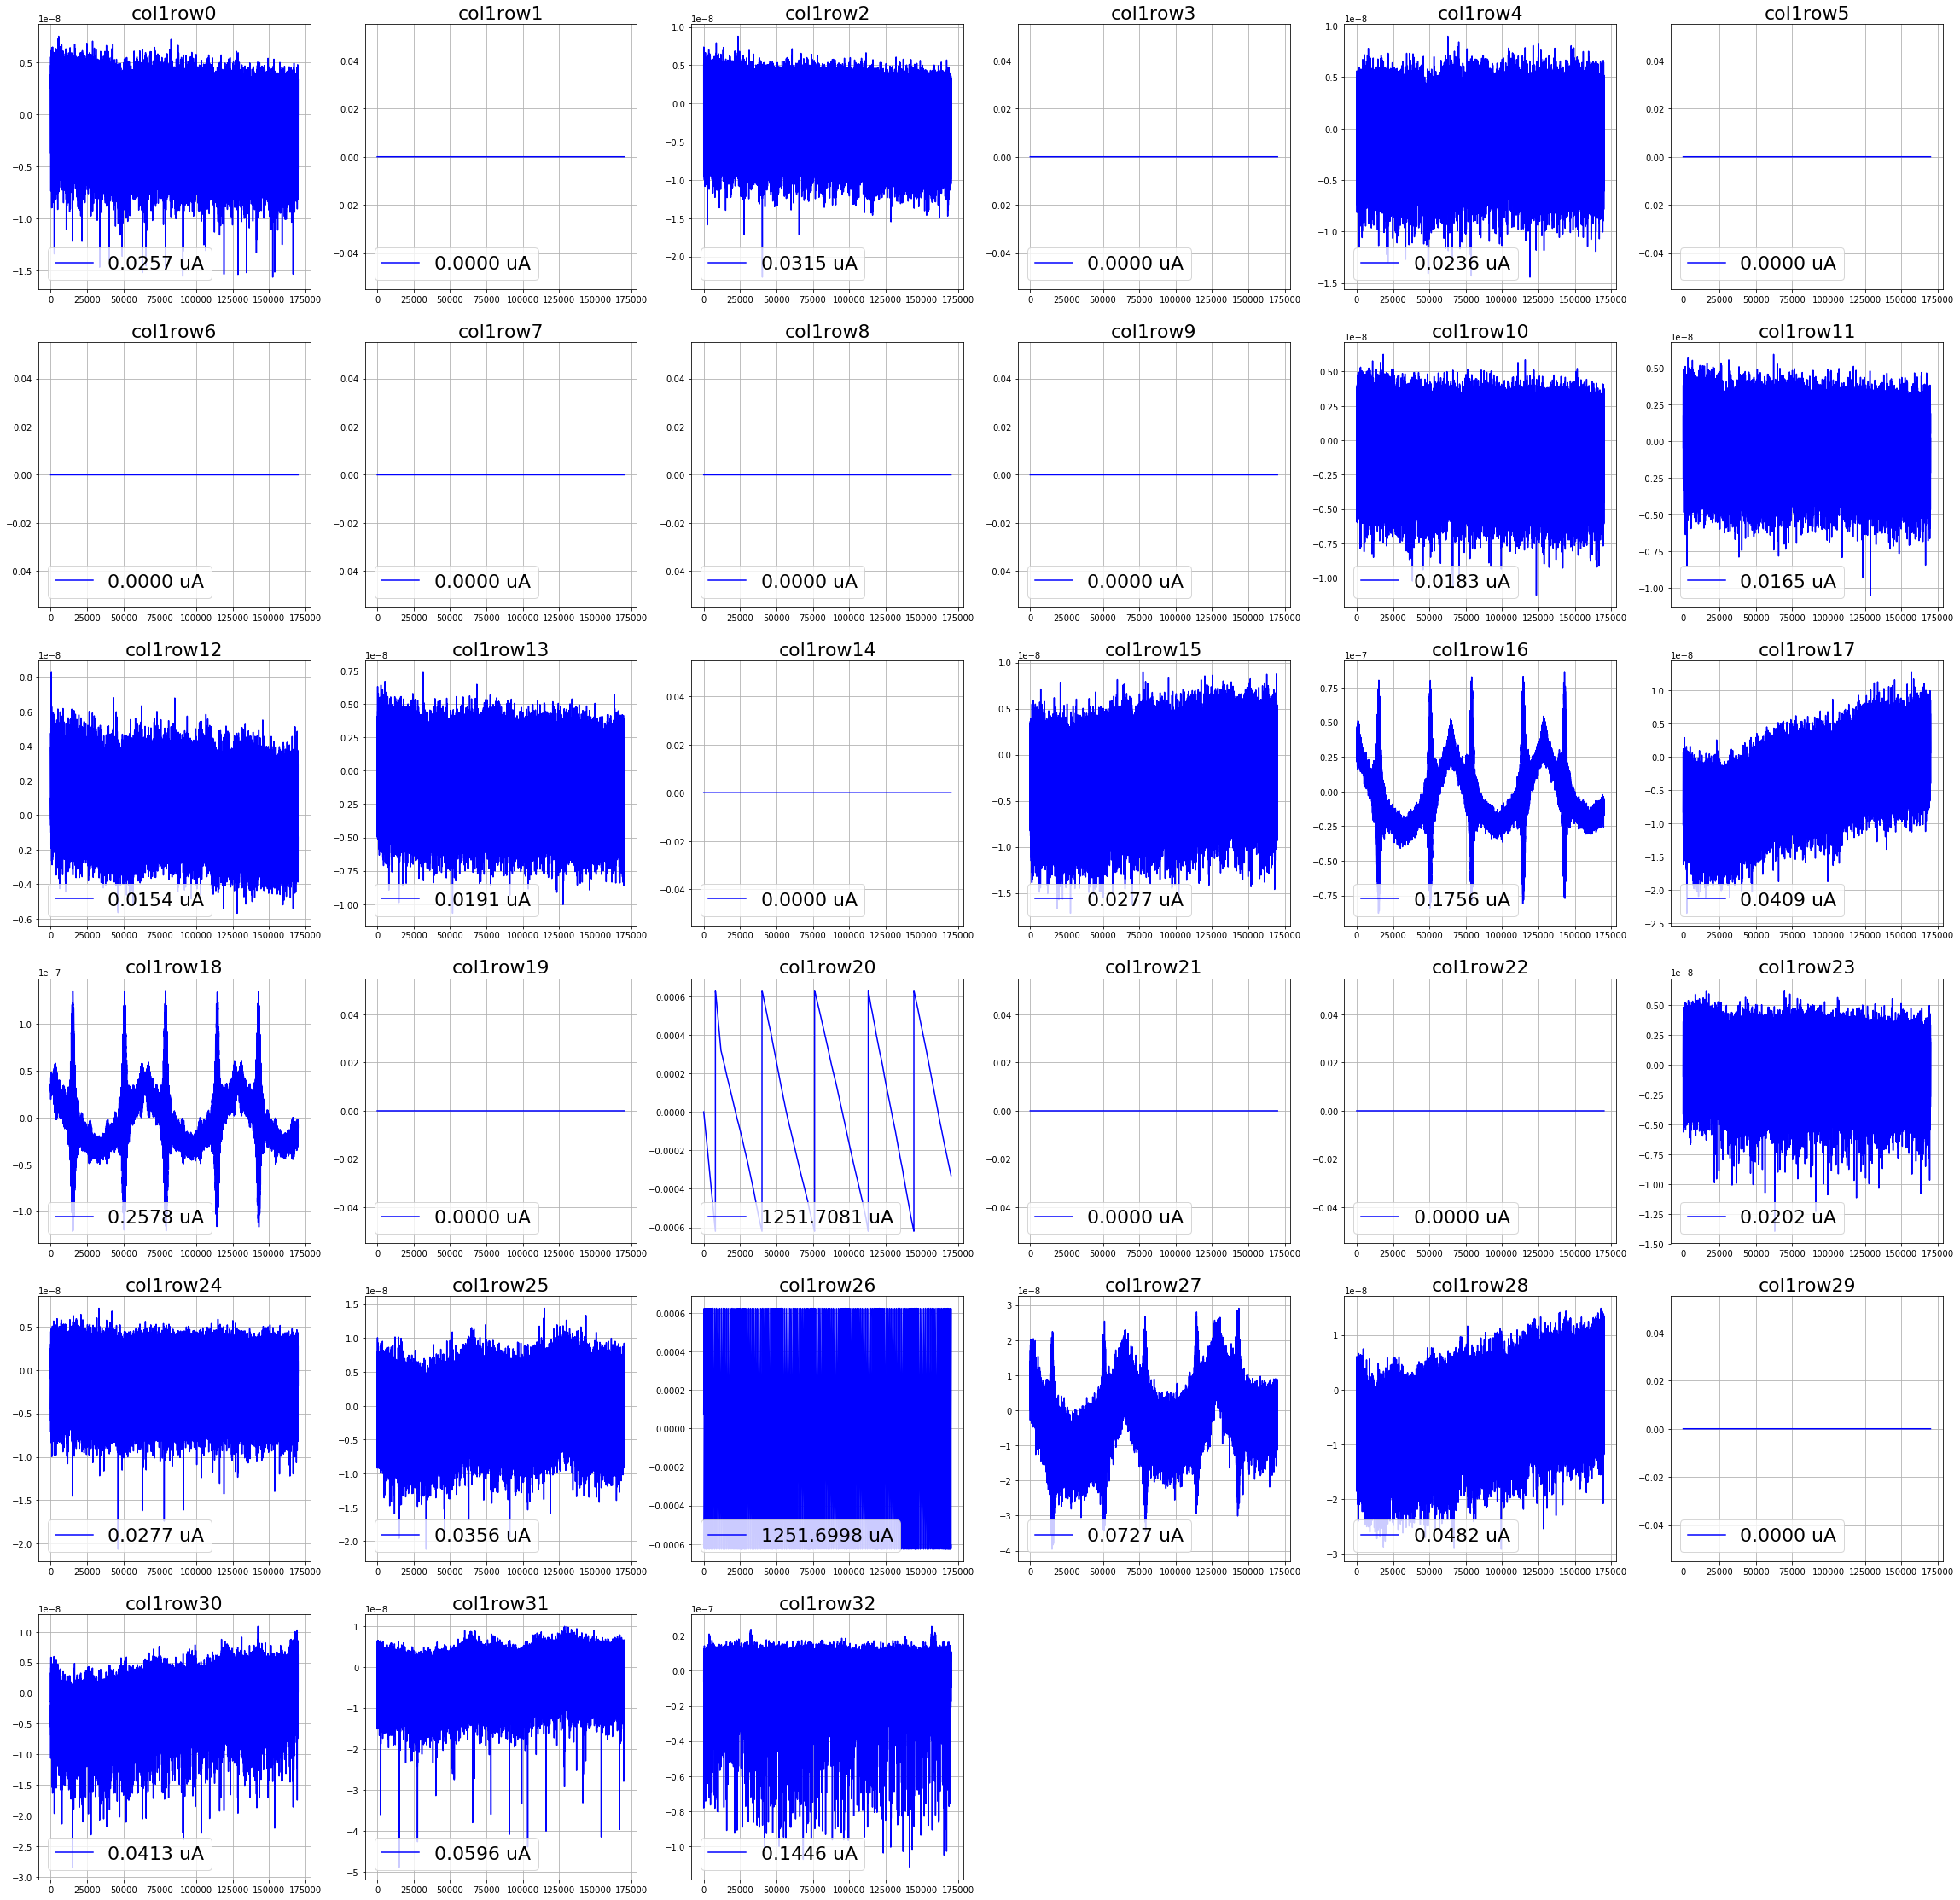

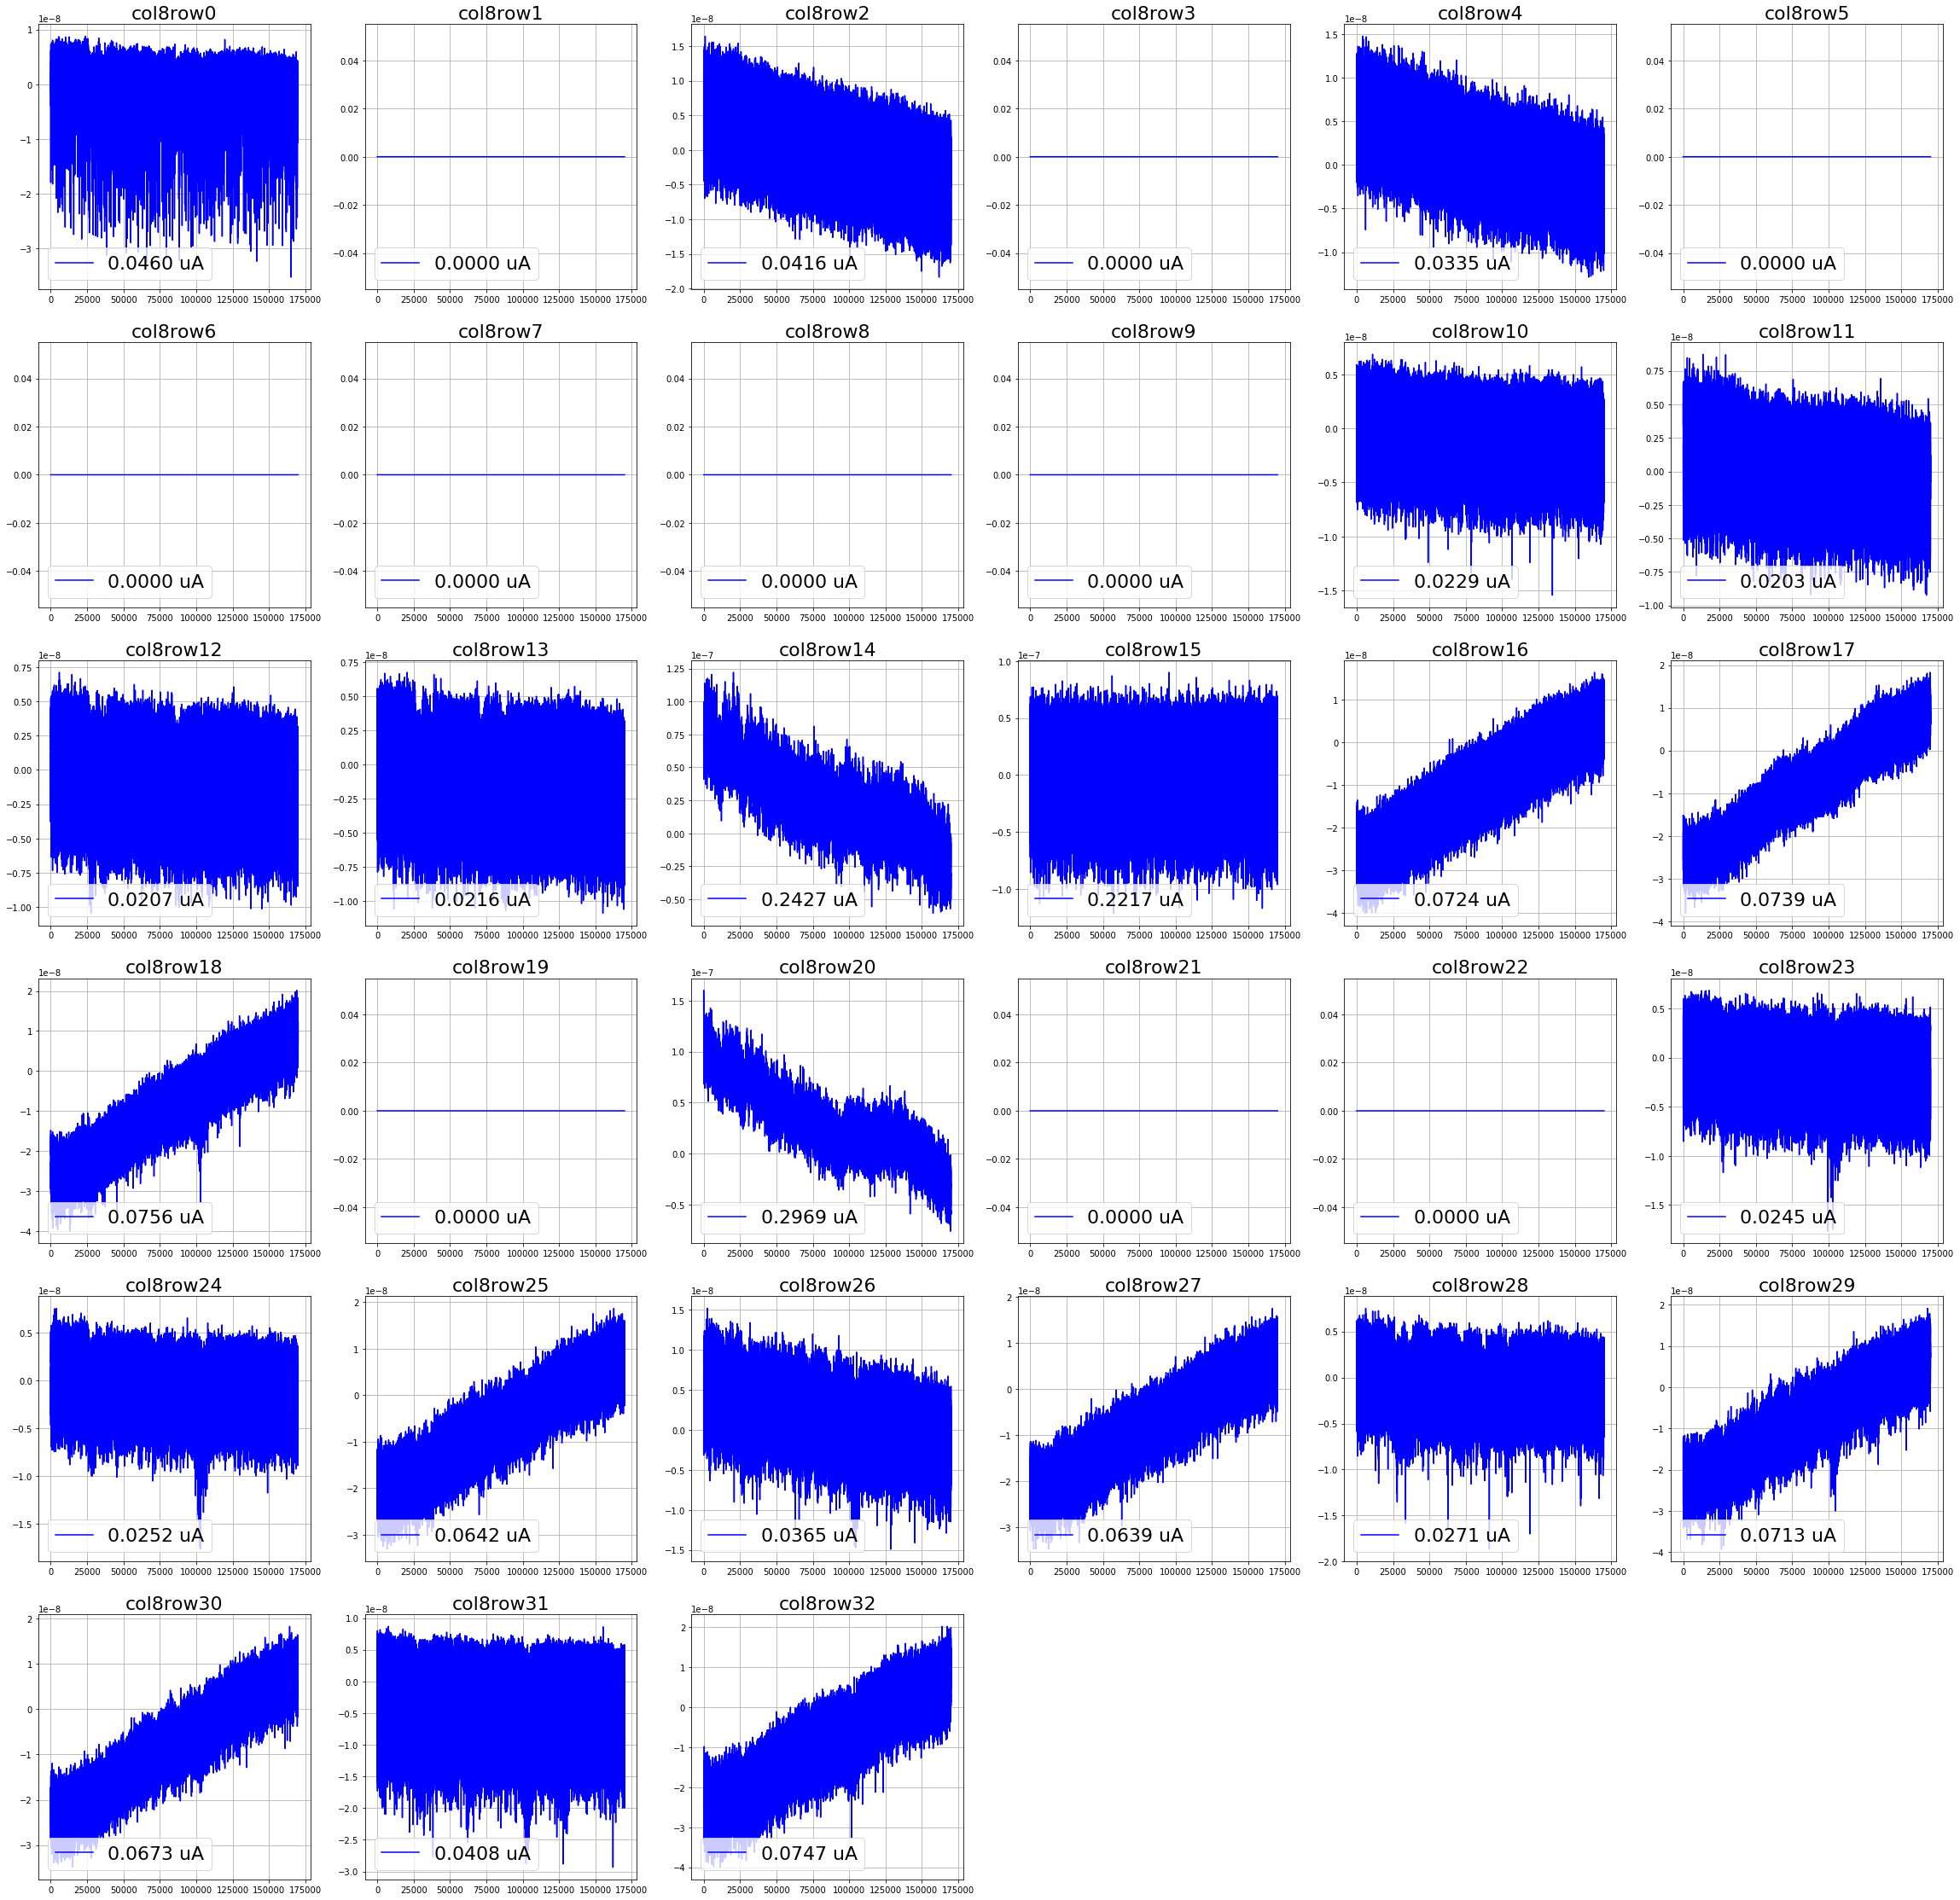

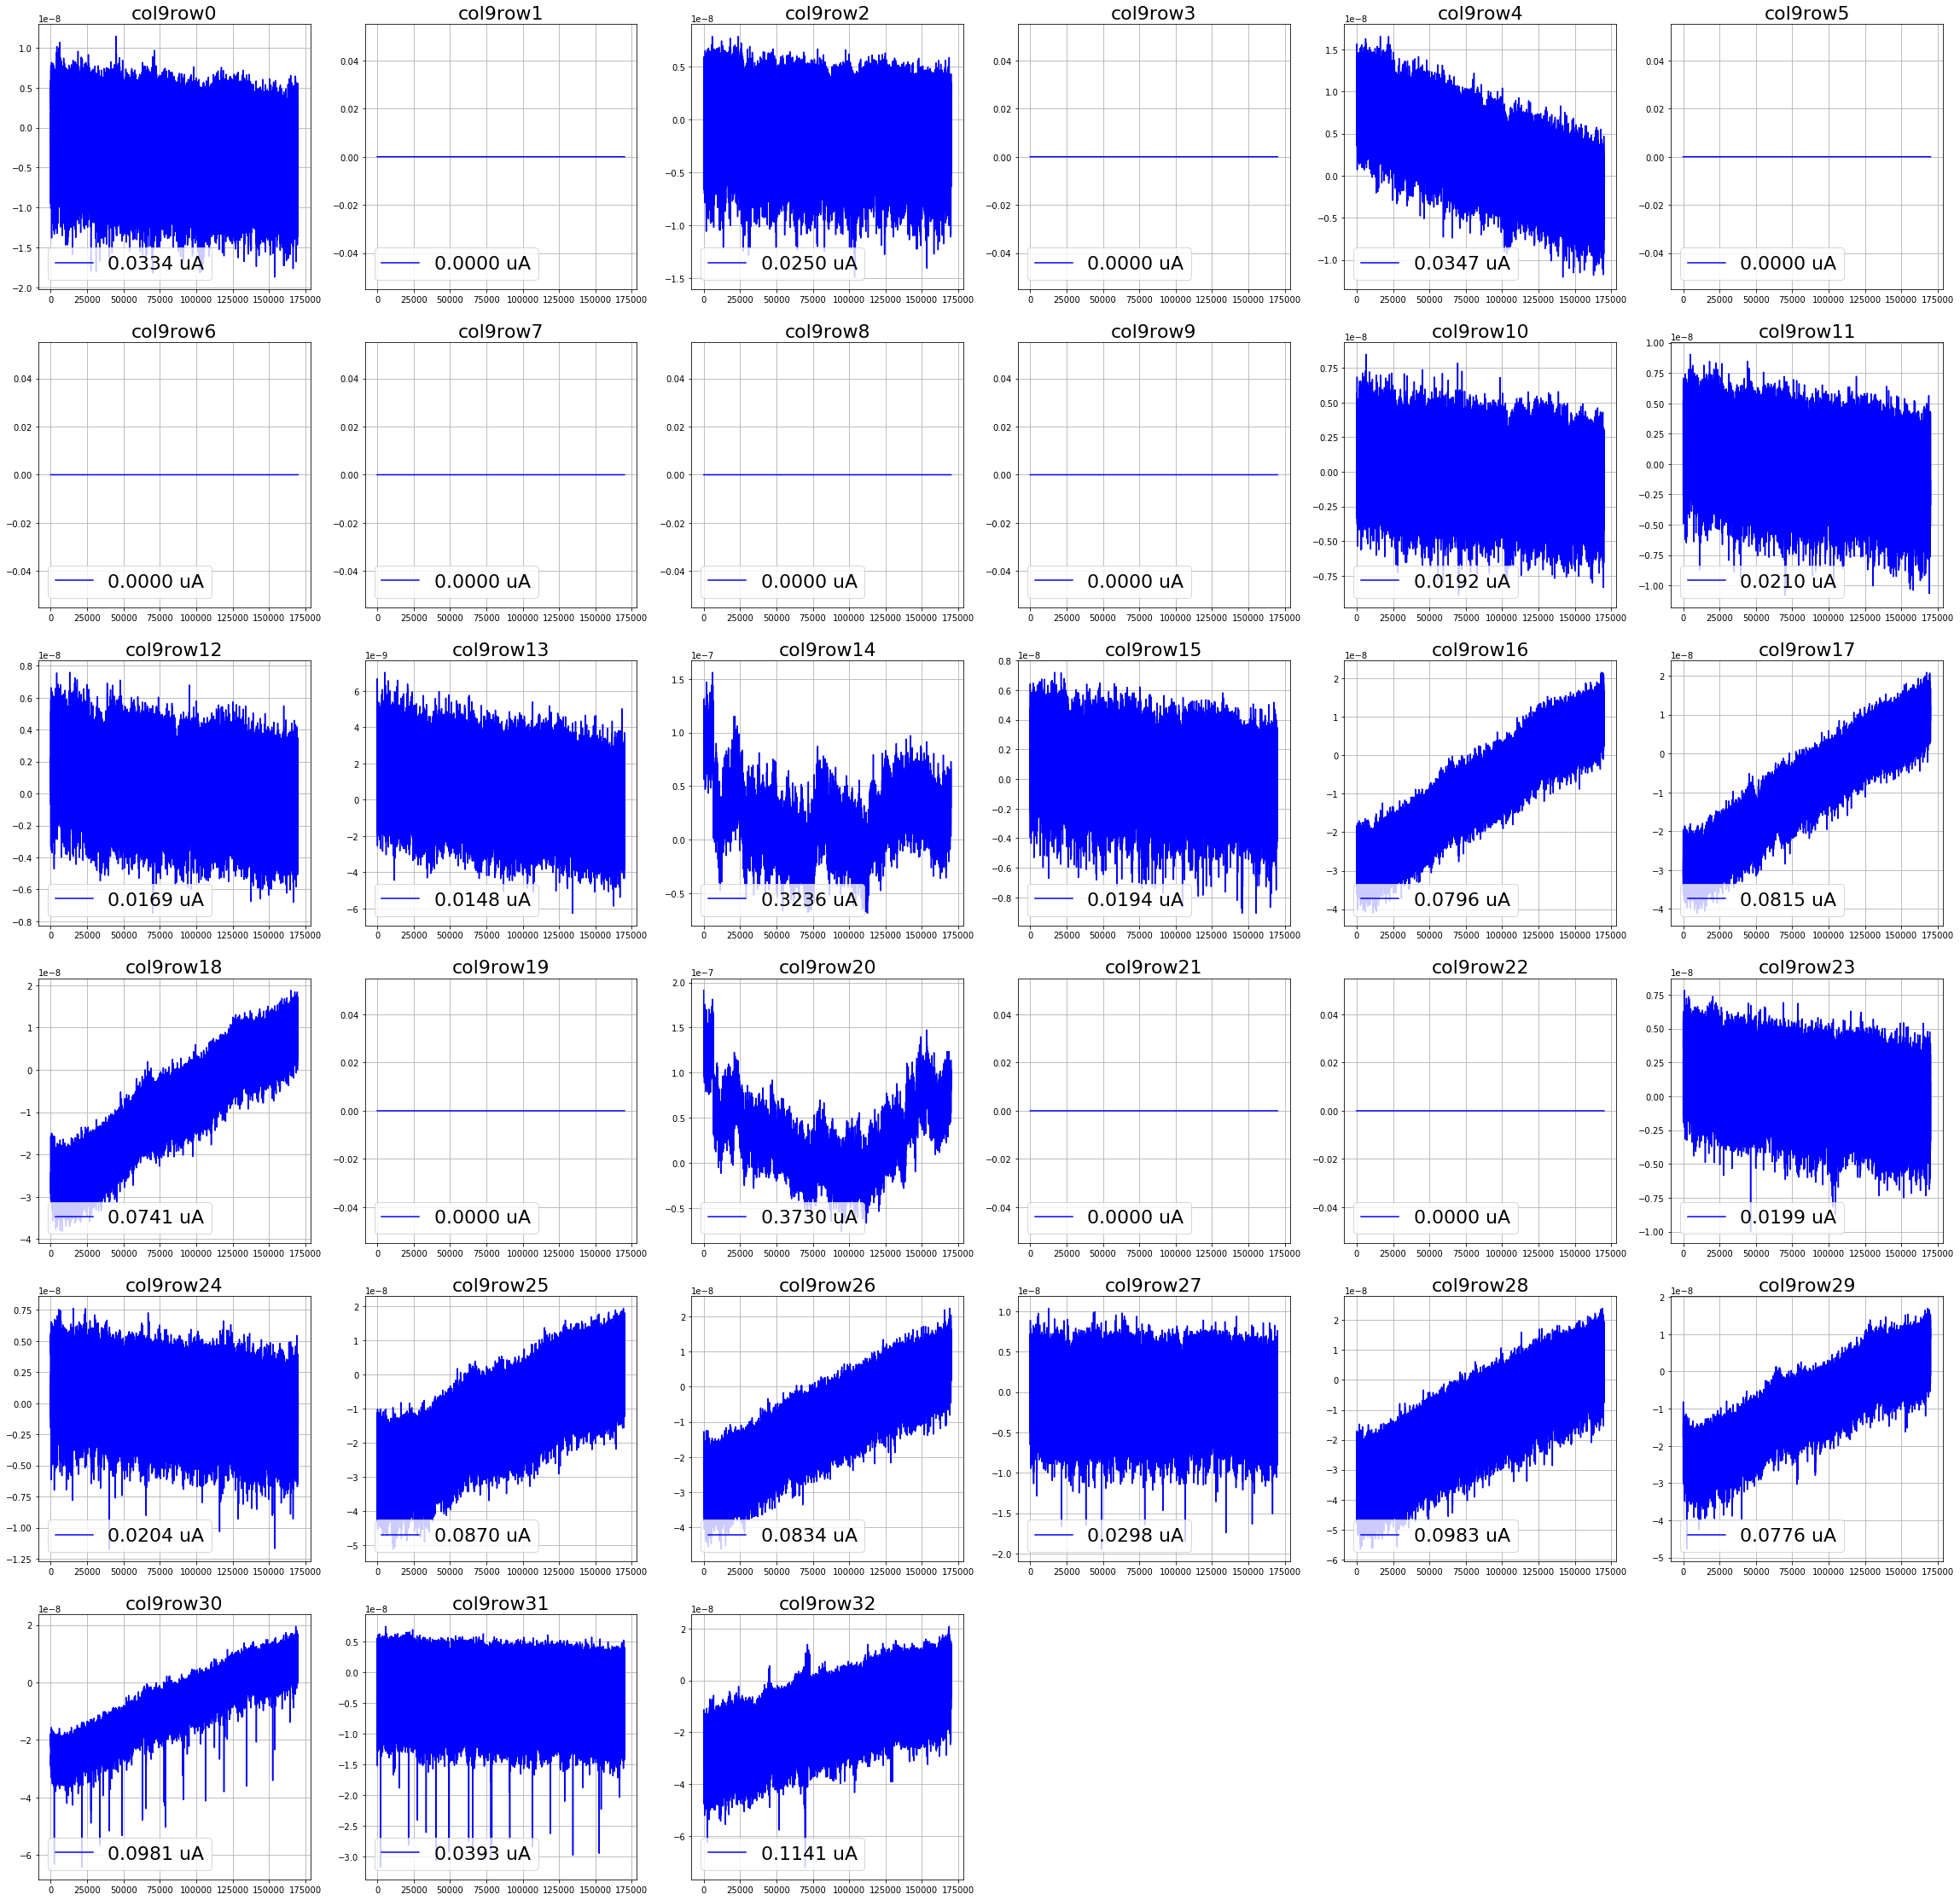

In [3]:
for im in ims:
    for icol in [im*2, im*2+1]:
        plt.figure(figsize=(40, 40))
        for irow in range(33):
            plt.subplot(6, 6, irow+1)
            #plt.xlim(3100,5000)
            plt.grid()
            try:
                fs = freq
                tod =fbs.fbCalib[irow,icol]
                N = int(len(tod) - np.mod(len(tod),int(period)))
                tod = tod[:N].reshape(int(N/int(period)),int(period))
                mtod = np.array(list(np.mean(tod, 1))*int(period)).reshape(int(period), int(N/int(period))).T
                tod = tod - mtod
                #plt.plot(tod.T, color='grey',alpha=0.5)
                tod = np.mean(tod, 0)
                amp = max(tod)-min(tod)
                #print(amp)
                plt.plot(tod[:170000], color='b', label="%.4f uA"%(amp*1e6))
                #plt.ylim(-1*amp, amp)
                plt.title('col' + str(icol) + 'row' + str(irow), fontsize=22)
                plt.legend(fontsize=22, loc=3)
            except: 
                continue
        plt.savefig(outpath+filename+'_col%d.png'%icol,dsp=300)
        #print("{:.0F}:{:.4E}".format(29,max(d[29, icol, :]) - min(d[29, icol, :])))